# Abstract

This report describes the analysis steps conducted on the the Naval Propulsion Plants Data Set available in the UCI machine 
learning repository.
Goal of the analysis is to predict values of the two output variables 'GT Compressor decay state coefficient' and 
'GT turbine decay state coefficient' based on the values of 16 features representing meassurements in the vessel and 
specifically the engine compartment. Basic data exploration steps were conducted, the dataset was cleaned and normalized.
After that the dataset was split into train and test dataset. The machine learning models applied were trained on the training 
set and then evaluated on the test dataset. Results of the analysis can be used to evaluate the state the engine, specifically 
the gas turbine compressor and turbines and to implement condition based or predictive maintenance on the vessel system.
Algorithms applied were linear regression and descision tree regressor. Both algorithms performed well on the given test dataset. 
Decision tree based regression predicted the values of the outcome variables better that linear regression. Accuracy of the 
algorithms was measured by the mean squared error.

# Description of the dataset

A. Coraddu, L. Oneto, A. Ghio, S. Savio, D. Anguita, M. Figari, Machine Learning Approaches for Improving Condition Based Maintenance of Naval Propulsion Plants, Journal of Engineering for the Maritime Environment, 2014, DOI: 10.1177/1475090214540874, (In Press)

"The experiments have been carried out by means of a numerical simulator of a naval vessel (Frigate) characterized by a Gas Turbine (GT) propulsion plant. The different blocks forming the complete simulator (Propeller, Hull, GT, Gear Box and Controller) have been developed and fine tuned over the year on several similar real propulsion plants. In view of these observations the available data are in agreement with a possible real vessel.
In this release of the simulator it is also possible to take into account the performance decay over time of the GT components such as GT compressor and turbines.
The propulsion system behaviour has been described with this parameters:
- Ship speed (linear function of the lever position lp).
- Compressor degradation coefficient kMc.
- Turbine degradation coefficient kMt.
so that each possible degradation state can be described by a combination of this triple (lp,kMt,kMc).
The range of decay of compressor and turbine has been sampled with an uniform grid of precision 0.001 so to have a good granularity of representation.
In particular for the compressor decay state discretization the kMc coefficient has been investigated in the domain [1; 0.95], and the turbine coefficient in the domain [1; 0.975].
Ship speed has been investigated sampling the range of feasible speed from 3 knots to 27 knots with a granularity of representation equal to tree knots.
A series of measures (16 features) which indirectly represents of the state of the system subject to performance decay has been acquired and stored in the dataset over the parameter's space."

The data can be downloaded from here: https://archive.ics.uci.edu/ml/datasets/Condition+Based+Maintenance+of+Naval+Propulsion+Plants
It consists of two .txt files containing data and headings respectivly.


In [5]:
import pandas as pd
import numpy as np
from numpy import *
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from math import sqrt

Lets have a quick look at the dataset and check out the names and units of the 16 predictor variables and the two output variables

In [6]:
featuredescription = pd.read_csv("C:/Features.txt", header=None)
featuredescription

,0
0,1 - Lever position (lp) [ ]
1,2 - Ship speed (v) [knots]
2,3 - Gas Turbine shaft torque (GTT) [kN m]
3,4 - Gas Turbine rate of revolutions (GTn) [rpm]
4,5 - Gas Generator rate of revolutions (GGn) [rpm]
5,6 - Starboard Propeller Torque (Ts) [kN]
6,7 - Port Propeller Torque (Tp) [kN]
7,8 - HP Turbine exit temperature (T48) [C]
8,9 - GT Compressor inlet air temperature (T1) [C]
9,10 - GT Compressor outlet air temperature (T2)...


In [10]:
#Read the dataset and check out the variables
data = pd.read_csv("C:/data.txt",sep=" ")
data.describe()

,lever_position,ship_speed,gt_shaft_torque,gt_rateOfrev,gg_rateOfrev,starboard_prop_torque,port_prop_torque,hp_turbine_exittemp,gt_comp_inlet_airtemp,gt_comp_outlet_airtemp,hp_turbine_exitpressure,gt_comp_inlet_airpressure,gt_comp_outlet_airpressure,gt_exhaust_gaspressure,turbine_injection_control,fuel_flow,gt_comp_decay,gt_turbine_decay
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.533635e-13,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


In [11]:
data.head()

,lever_position,ship_speed,gt_shaft_torque,gt_rateOfrev,gg_rateOfrev,starboard_prop_torque,port_prop_torque,hp_turbine_exittemp,gt_comp_inlet_airtemp,gt_comp_outlet_airtemp,hp_turbine_exitpressure,gt_comp_inlet_airpressure,gt_comp_outlet_airpressure,gt_exhaust_gaspressure,turbine_injection_control,fuel_flow,gt_comp_decay,gt_turbine_decay
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [12]:
data.shape

(11934, 18)

# Data cleaning and preparation

In [14]:
#Remove NA values
data = data.dropna()
data.isna().any()

lever_position                False
ship_speed                    False
gt_shaft_torque               False
gt_rateOfrev                  False
gg_rateOfrev                  False
starboard_prop_torque         False
port_prop_torque              False
hp_turbine_exittemp           False
gt_comp_inlet_airtemp         False
gt_comp_outlet_airtemp        False
hp_turbine_exitpressure       False
gt_comp_inlet_airpressure     False
gt_comp_outlet_airpressure    False
gt_exhaust_gaspressure        False
turbine_injection_control     False
fuel_flow                     False
gt_comp_decay                 False
gt_turbine_decay              False
dtype: bool

In [16]:
#Check out variance in of the features
data.var()


lever_position                6.897912e+00
ship_speed                    6.000503e+01
gt_shaft_torque               4.905611e+08
gt_rateOfrev                  5.992059e+05
gg_rateOfrev                  1.190970e+06
starboard_prop_torque         4.019860e+04
port_prop_torque              4.019860e+04
hp_turbine_exittemp           3.016493e+04
gt_comp_inlet_airtemp         0.000000e+00
gt_comp_outlet_airtemp        5.281784e+03
hp_turbine_exitpressure       1.176726e+00
gt_comp_inlet_airpressure     6.419307e-26
gt_comp_outlet_airpressure    2.848835e+01
gt_exhaust_gaspressure        1.079587e-04
turbine_injection_control     6.677760e+02
fuel_flow                     2.571825e-01
gt_comp_decay                 2.166848e-04
gt_turbine_decay              5.625471e-05
dtype: float64

gt_comp_inlet_airtemp doesn't have any variance across observations so we remove it because it won't be a good predictor in our models.

In [17]:
del data["gt_comp_inlet_airtemp"]

Also gt_comp_inlet_airpressure doesn't seem to have a high variance, let's check it out.

In [24]:
min(data["gt_comp_inlet_airpressure"])

0.998

In [26]:
max(data["gt_comp_inlet_airpressure"])

0.998

In [27]:
del data["gt_comp_inlet_airpressure"]

We also removed gt_comp_inlet_airpressure due to no variance and end up with 14 features for the prediction models. It should be noted that the dataset includes 2 output variables, "gt_comp_decay" and "gt_turbine_decay". They will be both be predicted seperatly. The features used for prediction are same for the two output variables:

In [29]:
features = ["lever_position","ship_speed","gt_shaft_torque","gt_rateOfrev","gg_rateOfrev","starboard_prop_torque",
            "port_prop_torque","hp_turbine_exittemp","gt_comp_outlet_airtemp","hp_turbine_exitpressure",
            "gt_comp_outlet_airpressure","gt_exhaust_gaspressure","turbine_injection_control",
            "fuel_flow"]
target1=["gt_comp_decay"]
target2=["gt_turbine_decay"]

Due to differences in units and properties of the 14 prediction features, they will be scaled using the StandardScaler from sklearn. Also the dataset will be further prepared for the algorithms applied later. We form a set with features and output variables.

In [31]:
X = StandardScaler().fit_transform(data[features])
y1=data[target1]
y2=data[target2]

# Linear Regression

The dataset will be split in training and test datasets, the model will then be fitted on the training set and afterwards evaluated on the test set. We evaluate the accuracy of the model by calculating the round mean squared error. We calculate the rmse for our first (gt_comp_decay) and our second outcome variable (gt_turbine_decay).

gt_comp_decay:

In [33]:
X_train, X_test, y1_train, y1_test = train_test_split(X,y1,test_size=0.2,random_state=324)
regressor=LinearRegression()
regressor.fit(X_train,y1_train)
y1_prediction=regressor.predict(X_test)
rmse1 = sqrt(mean_squared_error(y_true=y1_test,y_pred=y1_prediction))
#Print the mean ssquared prediction error
print(rmse1)

0.005949103989763792


gt_turbine_decay:

In [35]:
X_train, X_test, y2_train, y2_test = train_test_split(X,y2,test_size=0.2,random_state=324)
regressor=LinearRegression()
regressor.fit(X_train,y2_train)
y2_prediction=regressor.predict(X_test)
rmse2 = sqrt(mean_squared_error(y_true=y2_test,y_pred=y2_prediction))
print(rmse2)

0.0021941897143928205


# Decision tree regressor

As a comparison to the linear regression model from above we build a second model using decision tree regression. Let's check out if this model performes even better.

gt_comp_decay:

In [36]:
dtregressor1=DecisionTreeRegressor(max_depth=20)
dtregressor1.fit(X_train,y1_train)
y1dt_prediction=dtregressor1.predict(X_test)
rmse_DT1 = sqrt(mean_squared_error(y_true=y1_test,y_pred=y1dt_prediction))
print(rmse_DT1)

0.0015108187086251663


gt_turbine_decay:

In [38]:
dtregressor2=DecisionTreeRegressor(max_depth=20)
dtregressor2.fit(X_train,y2_train)
y2dt_prediction=dtregressor2.predict(X_test)
rmse_DT2 = sqrt(mean_squared_error(y_true=y2_test,y_pred=y2dt_prediction))
print(rmse_DT2)

0.0013551785958606434


# Results and visualization

Let's compare accuracy of the two models regarding the prediction of the two outcome variables. Values represent the rmse values of the models applied above.

In [49]:
resultsdata = np.array([["Linear Regression GT comp decay","Desc. Tree GT comp decay",
                         "Linear Regression GT turbine decay","Desc. Tree GT turbine decay"],
                        [rmse1,rmse2,rmse_DT1,rmse_DT2]])
res_df = pd.DataFrame(resultsdata)
res_df.columns = ['']*res_df.shape[1]
print(res_df.to_string(index=False))

                                                                                                                           
 Linear Regression GT comp decay  Desc. Tree GT comp decay  Linear Regression GT turbine decay  Desc. Tree GT turbine decay
            0.005949103989763792     0.0021941897143928205               0.0015108187086251663        0.0013551785958606434


We see that decision tree regressor performes better to predict the GT compressor decay and only a little better 
on the turbine decay state. Next we want to investigate which variables were the most important ones for the decision tree predictor in order to predict our two output variables GT compressor decay and GT turbine decay. We do this by plotting the features importances from the predictor as barplots.

In [50]:
feat_importances1 = pd.Series(dtregressor1.feature_importances_)
feat_importance1_df = pd.DataFrame(feat_importances1)
feat_importance1_df["feature"]=features
feat_importances2 = pd.Series(dtregressor2.feature_importances_)
feat_importance2_df = pd.DataFrame(feat_importances2)
feat_importance2_df["feature"]=features

GT compressor decay:

Text(0.5, 1.0, 'Feature importance for GT compressor decay')

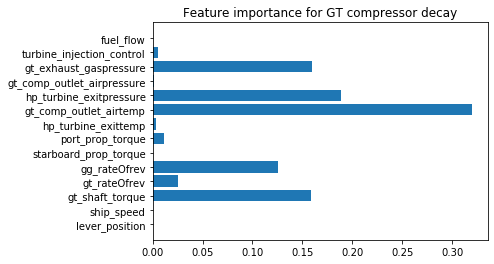

In [51]:
import matplotlib.pyplot as plt
plt.barh(feat_importance1_df["feature"],feat_importance1_df[0])
plt.title("Feature importance for GT compressor decay")

GT turbine decay:

Text(0.5, 1.0, 'Feature importance for GT turbine decay')

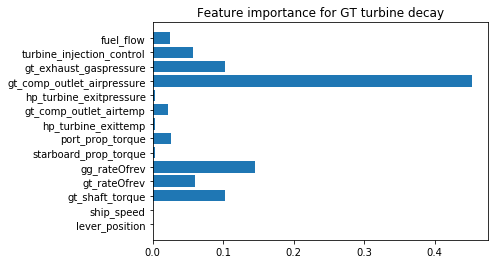

In [52]:
plt.barh(feat_importance2_df["feature"],feat_importance2_df[0])
plt.title("Feature importance for GT turbine decay")


# Conclusion 

We see in the plots above that the decision tree regressor uses features differntly for predicting our two ouput variables. For GT compressor decay it is the variable 'gt_comp_outlet_airtemp' that is most important for the algorithm. 'gt_comp_outlet_airpressure' is of highest importance for predicting GT turbine decay.
Both algorithms, linear regression and decision tree regression provide good results in predicting the values of our two output variables based on the 14 features available in the dataset used.
The difference in RSME, our measure of accuracy for the algorithms, is very small for GT turbine decay (only about 0.0002) and a little larger for GT compressor decay (0.0038).
THe Naval Propulsion Plants Data Set yields interesting opportunities for machine learning applications. The application of other regression algorithms like GLM,GAM, quantile regression or SVM as well as a combination of several models could be the basis of a system able to assist companies in maintaining production machines. Predictive maintenance is a hot topic nowadays for any company with machines that cost a lot of money when not producing goods. Implementing a system that is able to predict a possible machine failure in time can cut down repair costs and be an important part of a efficient production environment. 